## **Digit Recognizer CNN (MNIST)**

**Goal:**
Classify handwritten digits (0–9) using a simple Convolutional Neural Network built with Keras.

### Imports & Data Loading

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


In [5]:
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


### Build CNN Model

In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### Train & Evaluate

In [7]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, batch_size=64)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/5
844/844 [==============================] - 61s 65ms/step - loss: 0.1754 - accuracy: 0.9485 - val_loss: 0.0536 - val_accuracy: 0.9847
Epoch 2/5
844/844 [==============================] - 49s 58ms/step - loss: 0.0513 - accuracy: 0.9838 - val_loss: 0.0425 - val_accuracy: 0.9877
Epoch 3/5
844/844 [==============================] - 46s 55ms/step - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0396 - val_accuracy: 0.9892
Epoch 4/5
844/844 [==============================] - 54s 63ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0432 - val_accuracy: 0.9887
Epoch 5/5
313/313 [==============================] - 4s 12ms/step - loss: 0.0267 - accuracy: 0.9900
Test Accuracy: 0.9900


### Visualize Results

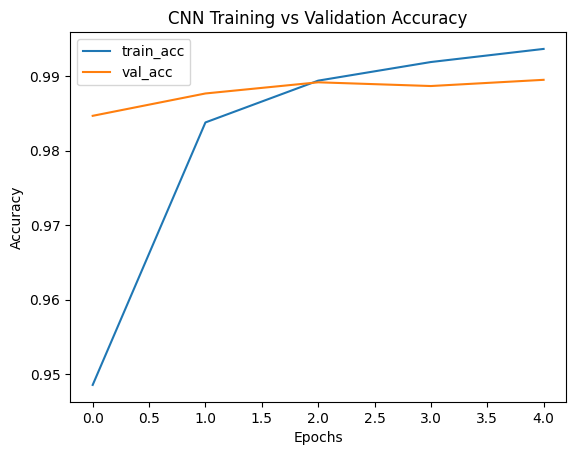

In [8]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("CNN Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("cnn_accuracy_curve.png", dpi=300)
plt.show()


### Save Model

In [9]:
model.save("digit_recognizer_cnn.h5")